# Data Exploration

In [ ]:
#!mkdir task2_data
!unzip task2_data.zip

Archive:  task2_data.zip
   creating: task2_data/
  inflating: task2_data/dev.csv      
  inflating: __MACOSX/task2_data/._dev.csv  
  inflating: task2_data/train.csv    
  inflating: __MACOSX/task2_data/._train.csv  


In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import missingno

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("task2_data/train.csv")

In [ ]:
data.head()

,Unnamed: 0,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,11283,11284,Maintenance Mechanic,"US, NY, Niagara Falls",Maintenance,NaN,"Niacet is a leading producer of organic salts,...",DEPARTMENT: MaintenanceREPORTS TO: ...,NaN,NaN,0,1,0,Full-time,Mid-Senior level,NaN,Chemicals,Manufacturing,0
1,11510,11511,LS17 6DJ Customer Service Apprenticeship Avail...,"GB, , Leeds",NaN,NaN,Established on the principles that full time e...,This is fantastic opportunity for someone want...,Government funding is only available for 16-18...,Future prospects,0,1,1,NaN,NaN,NaN,NaN,NaN,0
2,5662,5663,Technical Support Representative,"US, OH, Westerville",NaN,NaN,Working for Status Solutions means that you ar...,A Customer Support Representative at Status So...,"TasksMonitor the Network Operations Center, ca...",Starting salary based on experience and educat...,0,1,1,Full-time,Not Applicable,Unspecified,Computer Software,Customer Service,0
3,16815,16816,Ruby on Rails Specialist,"US, CA, Long Beach",NaN,NaN,NaN,Ruby on Rails Web Engineer (RoR)Now Hiring Rub...,NaN,NaN,0,0,0,Full-time,Mid-Senior level,NaN,Information Technology and Services,NaN,0
4,3732,3733,Caregiver - Bridgman,"US, MI, Bridgman",NaN,NaN,"""Our mission to our clients is to preserve the...",Home Sweet Home In-Home Care is one of the fas...,NaN,Competitive compensation with performance revi...,0,1,1,NaN,NaN,High School or equivalent,Hospital & Health Care,Health Care Provider,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14304 entries, 0 to 14303
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           14304 non-null  int64 
 1   job_id               14304 non-null  int64 
 2   title                14304 non-null  object
 3   location             14029 non-null  object
 4   department           5095 non-null   object
 5   salary_range         2311 non-null   object
 6   company_profile      11626 non-null  object
 7   description          14303 non-null  object
 8   requirements         12127 non-null  object
 9   benefits             8558 non-null   object
 10  telecommuting        14304 non-null  int64 
 11  has_company_logo     14304 non-null  int64 
 12  has_questions        14304 non-null  int64 
 13  employment_type      11496 non-null  object
 14  required_experience  8613 non-null   object
 15  required_education   7789 non-null   object
 16  indu

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,14304.0,8923.766289,5174.517863,0.0,4457.75,8882.5,13444.25,17879.0
job_id,14304.0,8924.766289,5174.517863,1.0,4458.75,8883.5,13445.25,17880.0
telecommuting,14304.0,0.043764,0.204577,0.0,0.00,0.0,0.00,1.0
has_company_logo,14304.0,0.793974,0.404464,0.0,1.00,1.0,1.00,1.0
has_questions,14304.0,0.493079,0.499970,0.0,0.00,0.0,1.00,1.0
fraudulent,14304.0,0.050825,0.219648,0.0,0.00,0.0,0.00,1.0


In [ ]:
# checking duplicates

data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

Unnamed: 0                 0
job_id                     0
title                      0
location                 275
department              9209
salary_range           11993
company_profile         2678
description                1
requirements            2177
benefits                5746
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         2808
required_experience     5691
required_education      6515
industry                3950
function                5179
fraudulent                 0
dtype: int64

In [ ]:
print("Total missing values: ", data.isnull().values.sum())

Total missing values:  56222


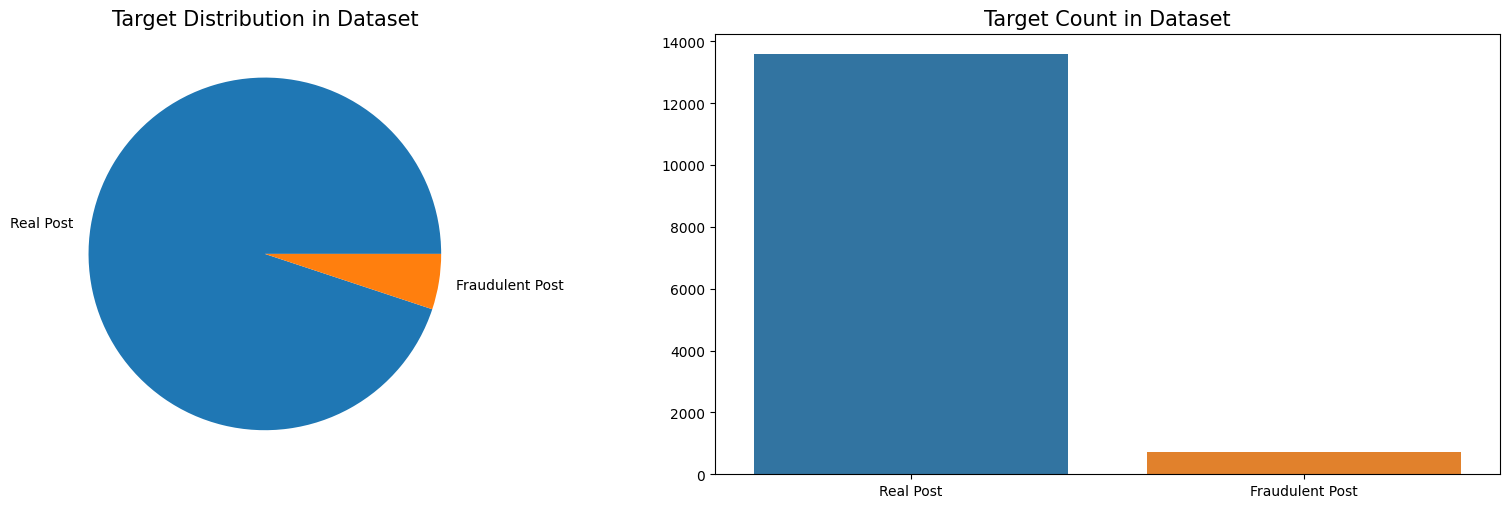

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
plt.tight_layout()

data["fraudulent"].value_counts().plot(kind='pie', ax=axes[0], labels=['Real Post', 'Fraudulent Post'])
temp = data["fraudulent"].value_counts()
sns.barplot(temp.index, temp, ax=axes[1])

axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')
axes[1].set_xticklabels(["Real Post", "Fraudulent Post"])

axes[0].set_title('Target Distribution in Dataset', fontsize=15)
axes[1].set_title('Target Count in Dataset', fontsize=15)

plt.show()

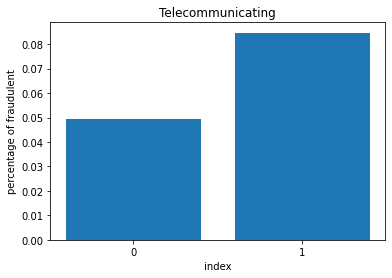

In [ ]:
frad_telecom = data.groupby('telecommuting').mean()['fraudulent']

plt.title("Telecommunicating")
plt.xlabel('index')
plt.ylabel('percentage of fraudulent')
plt.bar(np.array(frad_telecom.index, dtype='str'), frad_telecom)
plt.show()


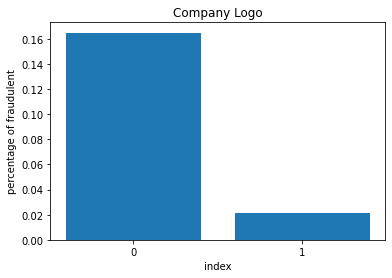

In [ ]:
fraud_logo = data.groupby('has_company_logo').mean()['fraudulent']

plt.title("Company Logo")
plt.xlabel('index')
plt.ylabel('percentage of fraudulent')
plt.bar(np.array(fraud_logo.index, dtype='str'), fraud_logo)
plt.show()


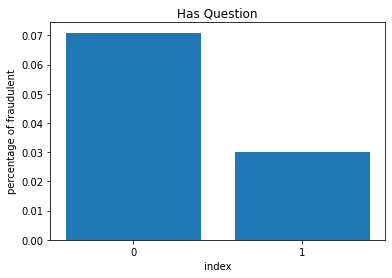

In [ ]:
fraud_question = data.groupby('has_questions').mean()['fraudulent']

plt.title("Has Question")
plt.xlabel('index')
plt.ylabel('percentage of fraudulent')
plt.bar(np.array(fraud_question.index, dtype='str'), fraud_question)
plt.show()

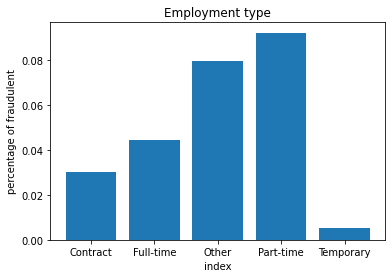

In [ ]:
fraud_type = data.groupby('employment_type').mean()['fraudulent']


plt.title("Employment type")
plt.xlabel('index')
plt.ylabel('percentage of fraudulent')
plt.bar(np.array(fraud_type.index, dtype='str'), fraud_type)
plt.show()

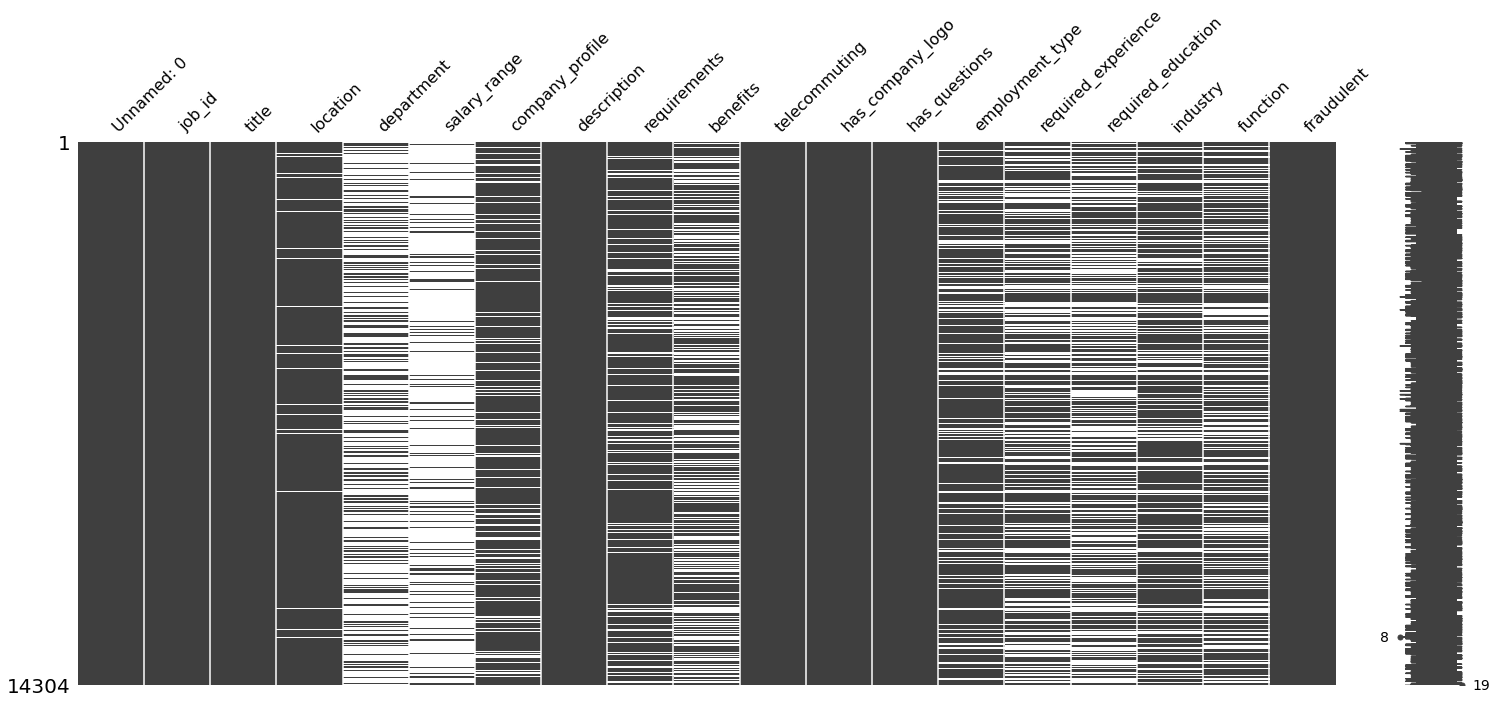

In [ ]:
missingno.matrix(data)

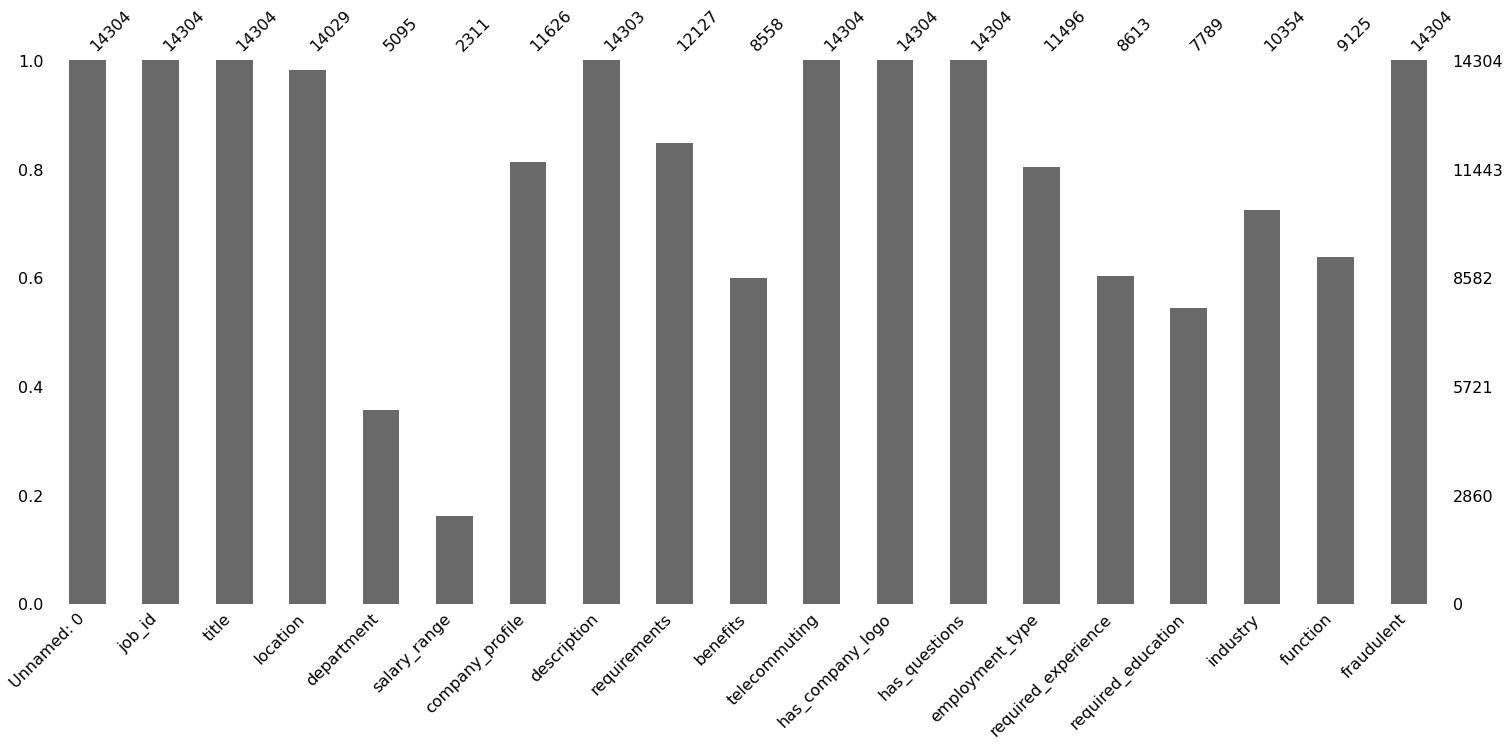

In [ ]:
missingno.bar(data)

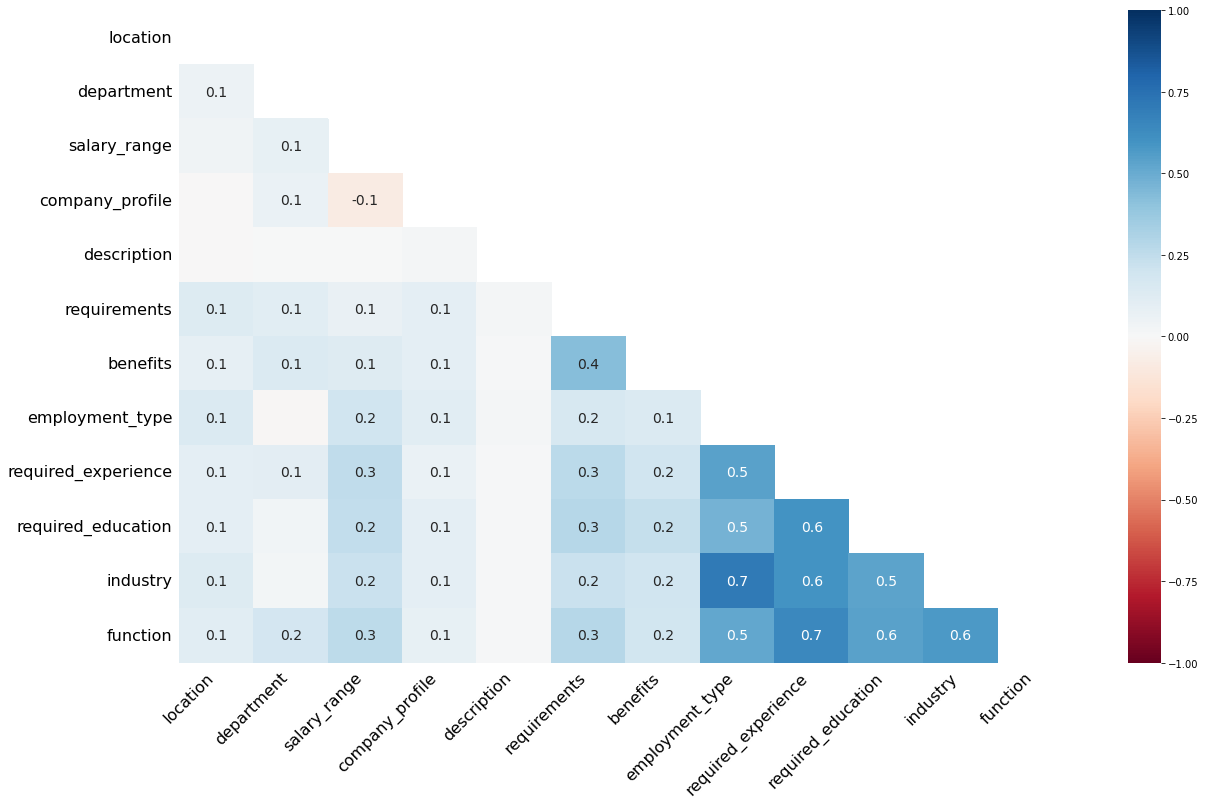

In [ ]:
missingno.heatmap(data)

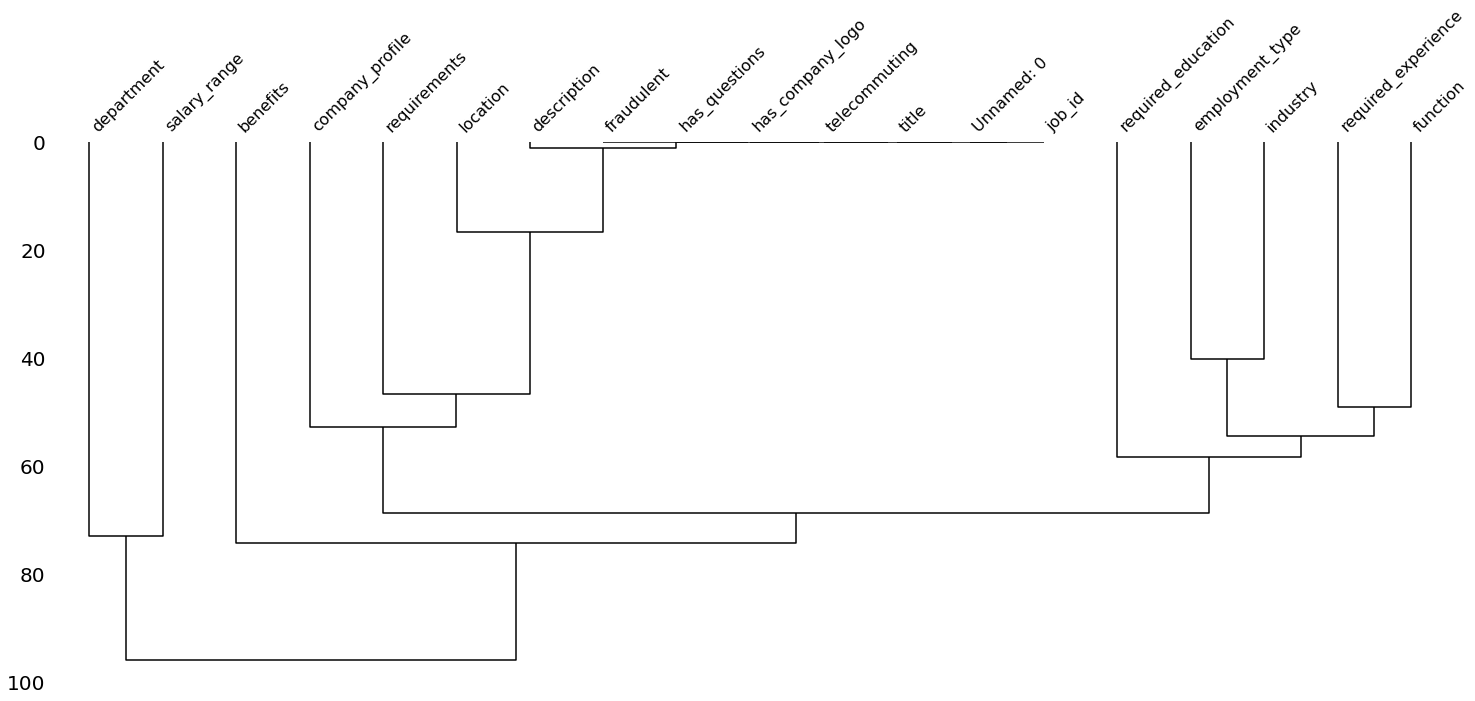

In [ ]:
missingno.dendrogram(data)

### Future Tasks:
#### Preprocess:
1. Deal with missing data
2. Explore Textual data further
3. try out imblearn https://imbalanced-learn.org/stable/
4. Transformers?

In [ ]:
data.drop(columns=['Unnamed: 0', 'job_id'], inplace=True)

### Percentage of misssing data in each column

In [ ]:
for i in data.columns.tolist():
    if data[i].isnull().sum()>0:
        print('Feature',i,': {:.2f}%'.format(100 - (data[i].isnull().sum()*100/len(data[i]))))

Feature location : 98.08%
Feature department : 35.62%
Feature salary_range : 16.16%
Feature company_profile : 81.28%
Feature description : 99.99%
Feature requirements : 84.78%
Feature benefits : 59.83%
Feature employment_type : 80.37%
Feature required_experience : 60.21%
Feature required_education : 54.45%
Feature industry : 72.39%
Feature function : 63.79%


In [ ]:
# data.drop(columns=['salary_range', 'department', 'required_education', 'required_experience'])

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,industry,function,fraudulent
0,Maintenance Mechanic,"US, NY, Niagara Falls","Niacet is a leading producer of organic salts,...",DEPARTMENT: MaintenanceREPORTS TO: ...,NaN,NaN,0,1,0,Full-time,Chemicals,Manufacturing,0
1,LS17 6DJ Customer Service Apprenticeship Avail...,"GB, , Leeds",Established on the principles that full time e...,This is fantastic opportunity for someone want...,Government funding is only available for 16-18...,Future prospects,0,1,1,NaN,NaN,NaN,0
2,Technical Support Representative,"US, OH, Westerville",Working for Status Solutions means that you ar...,A Customer Support Representative at Status So...,"TasksMonitor the Network Operations Center, ca...",Starting salary based on experience and educat...,0,1,1,Full-time,Computer Software,Customer Service,0
3,Ruby on Rails Specialist,"US, CA, Long Beach",NaN,Ruby on Rails Web Engineer (RoR)Now Hiring Rub...,NaN,NaN,0,0,0,Full-time,Information Technology and Services,NaN,0
4,Caregiver - Bridgman,"US, MI, Bridgman","""Our mission to our clients is to preserve the...",Home Sweet Home In-Home Care is one of the fas...,NaN,Competitive compensation with performance revi...,0,1,1,NaN,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14299,Creative Director - Art,"US, NY, New York",Kettle is an independent digital agency based ...,Kettle is hiring a Creative DirectorJob Locati...,NaN,NaN,0,1,1,NaN,NaN,NaN,0
14300,Data Scientist - Meteorology,"US, CA, San Carlos","Working at FBNAt FBN, we put farmers first. Fo...",FBN's primary mission is to provide farmers wi...,"ResponsibilitiesOnce you join our team, you wi...",Health insuranceStock optionsFarm visits,0,1,0,Full-time,Computer Software,Science,0
14301,Client Support Specialist,"CA, BC, Victoria","Based out of Vancouver, and Victoria, BC, Cana...",We are looking for a self-motivated Client Sup...,We require you to:Respond to customer requests...,NaN,1,1,0,Full-time,Internet,Customer Service,0
14302,Freelance Oromo Interpreters,"GB, LND, West London",Welcome to Trans4u Ltd.We are an International...,Trans4u Ltd | Translation &amp; Interpreting S...,A minimum of two years of relevant work experi...,"We pay you Interpreting time, waiting time, tr...",0,1,1,NaN,NaN,NaN,0


In [ ]:
departments = data['department']
departments = departments.dropna()
print("department", "x.split()", "len(x.split())", "len(x)")
for department in departments[:20]:
    print(department, department.split(), len(department.split()), len(department))

department x.split() len(x.split()) len(x)
Maintenance ['Maintenance'] 1 11
Technology ['Technology'] 1 10
Engineering ['Engineering'] 1 11
Nursing ['Nursing'] 1 7
Engineering ['Engineering'] 1 11
Client Services ['Client', 'Services'] 2 15
Development ['Development'] 1 11
Product Management ['Product', 'Management'] 2 18
Development ['Development'] 1 11
ADS ['ADS'] 1 3
HR ['HR'] 1 2
Production ['Production'] 1 10
Sales ['Sales'] 1 5
Operations ['Operations'] 1 10
Sales ['Sales'] 1 5
Marketing ['Marketing'] 1 9
Engineering ['Engineering'] 1 11
Sensor Systems ['Sensor', 'Systems'] 2 14
Sales ['Sales'] 1 5
Sales ['Sales'] 1 5


## Text length histogram for all text fields

It helps to understand sentence size for preprocessing.

Takeaways:
* `Description`: long text with average 1213 words
* `Requirements`: long text with average 593 words
* `company_profile`: long text with average 620 words
* `benefits`: long text with average 210 words

In [ ]:
import seaborn as sns

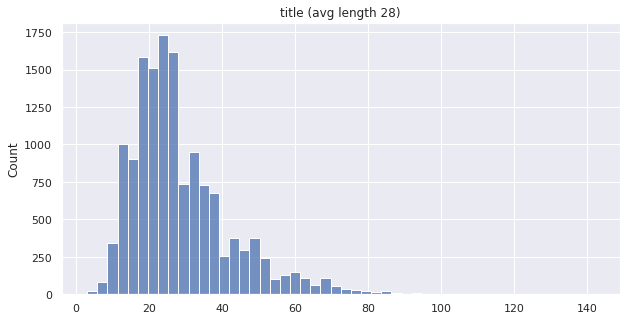

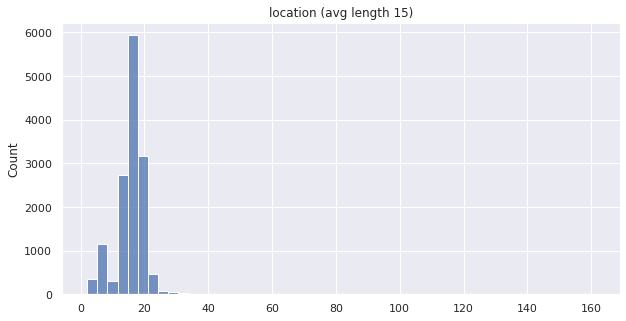

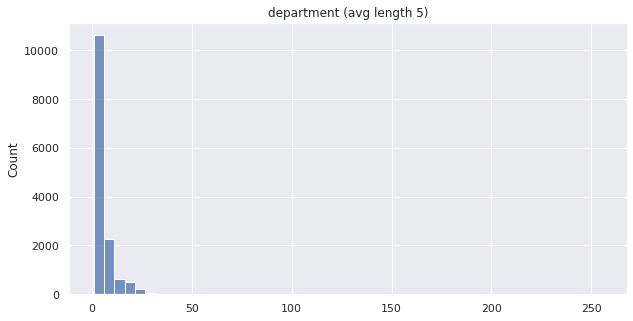

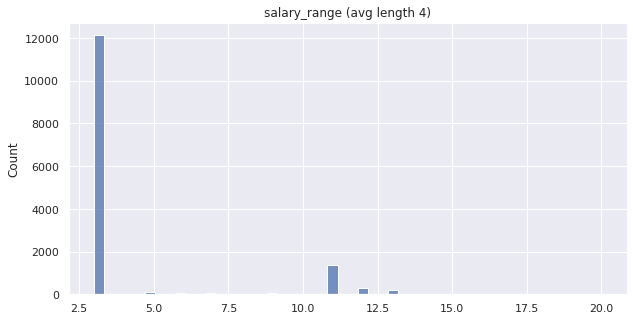

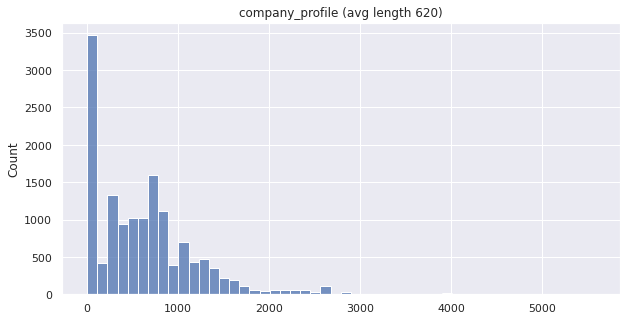

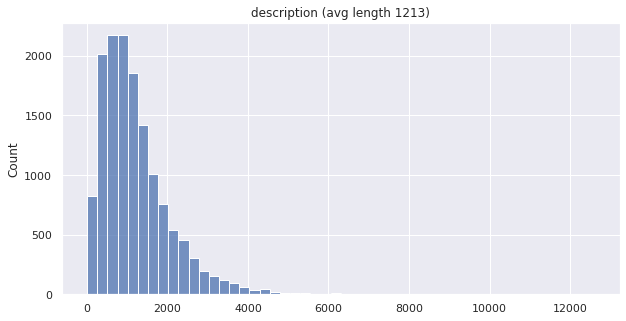

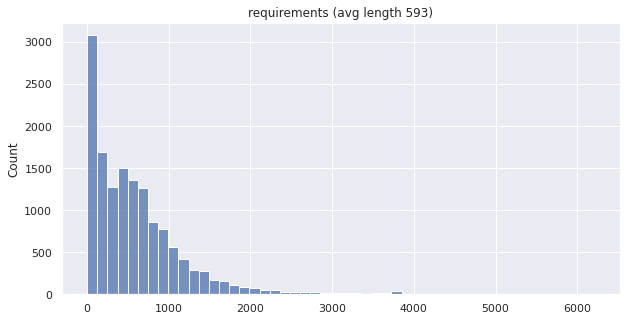

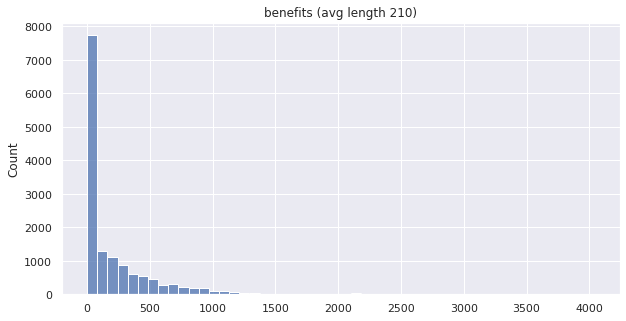

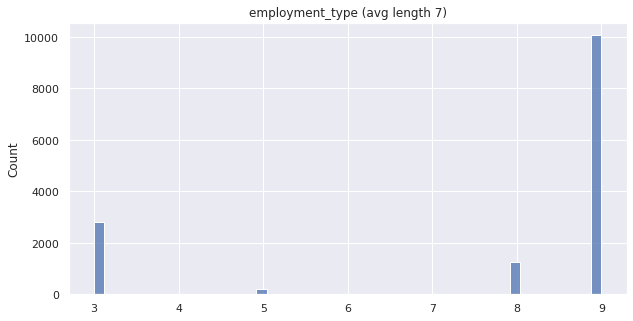

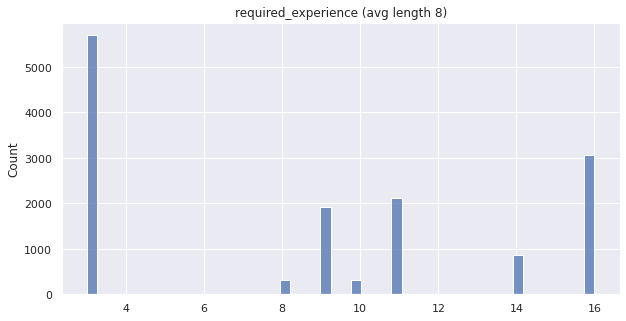

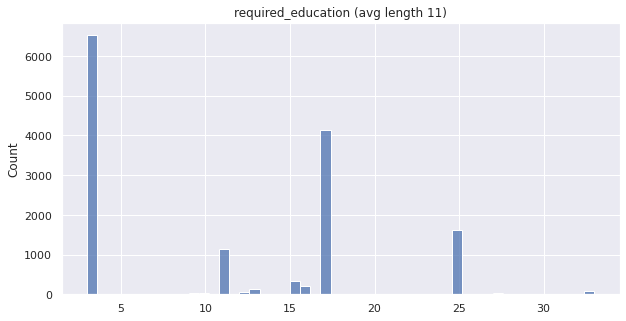

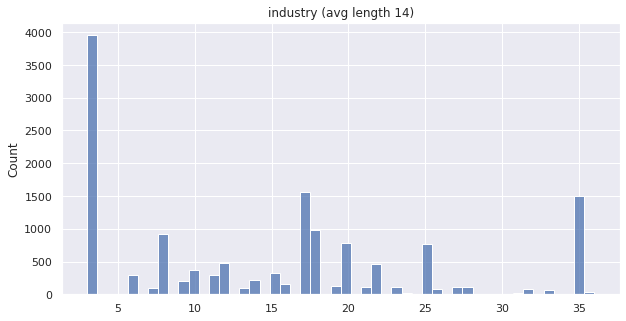

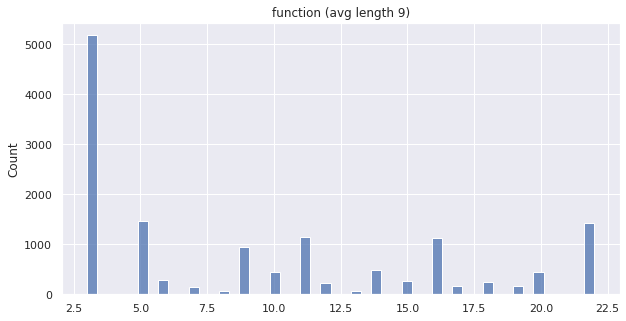

In [ ]:
text_columns = [col_name for col_name, col_type in data.dtypes.iteritems() if col_type=="object"]
sns.set(style="darkgrid")
for col in text_columns:
  plt.figure(figsize=(10,5))
  avg_length = int(np.mean(data[col].apply(lambda x: len(str(x))).values))
  sns.histplot(data=data[col].apply(lambda x: len(str(x))).values, bins=50)
  plt.title(f"{col} (avg length {avg_length})")
  plt.show()

In [ ]:
description_lengths = data["description"].apply(lambda x: len(str(x))).values.tolist()
big_sentences = [idx for idx, length in enumerate(description_lengths) if length > 512]

In [ ]:
len(big_sentences)/len(description_lengths)

0.7994267337807607

In [ ]:
for sentence_idx in big_sentences[:10]:
  print(f"sentence {sentence_idx}: \n\t{data['description'].values[sentence_idx]}")

sentence 0: 
	DEPARTMENT:      MaintenanceREPORTS TO:       Maintenance ManagerLOCATION:            Niagara Falls, NYPOSITIONS:          Maintenance MechanicAbout us: Niacet is a leading producer of organic salts, including propionates and acetates, serving the Food, Pharmaceutical and Technical industries. With two longstanding and fully automated manufacturing sites, located in Niagara Falls, NY USA, and Tiel, The Netherlands, Niacet offers world-class quality products to a global market.Our products fill vital needs in a broad range of applications that are essential to everyday life including food preservation, antibiotic formulation, dialysis treatment, energy production, and more.Maintenance Mechanic Position:Niagara Falls chemical manufacturer is looking for experienced Maintenance mechanic. General Job duties include, but are not limited to:--Knowledge of process piping, autovalves and dry packaging a plus.--Must be able to work on gearboxes, agitators and pumps.--May be requir

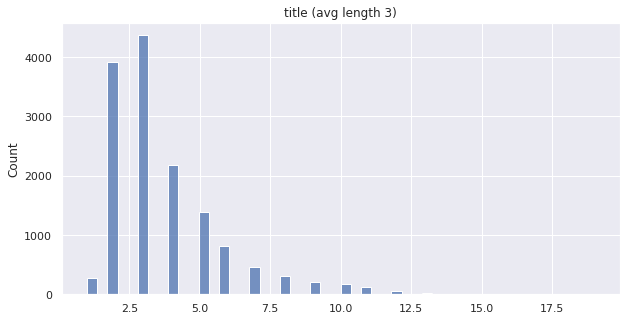

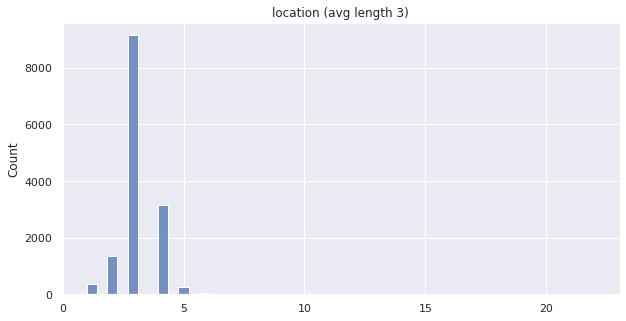

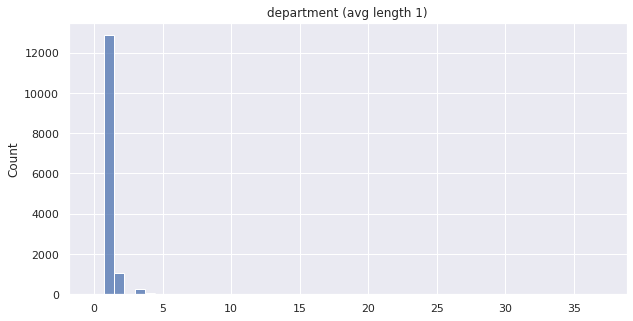

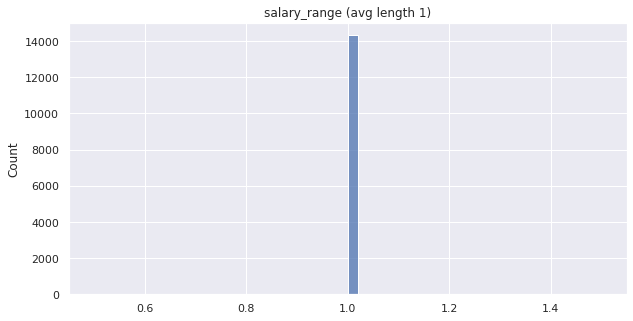

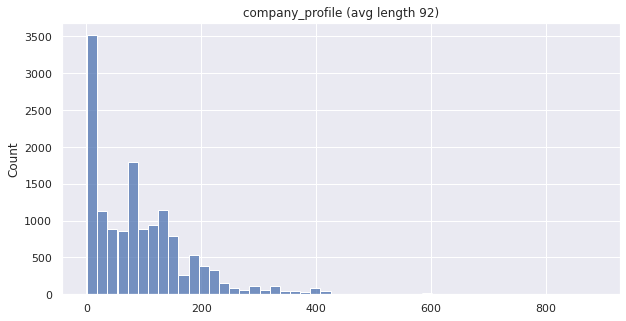

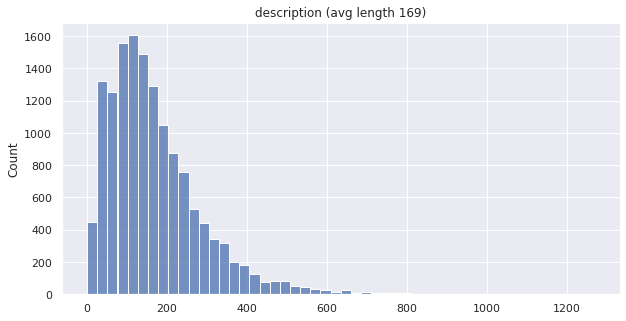

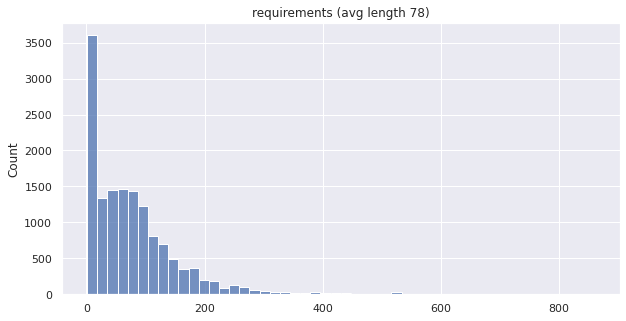

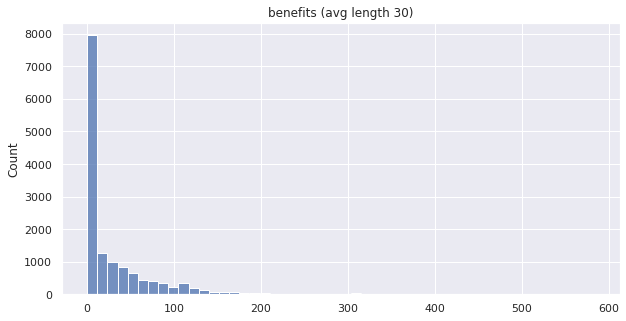

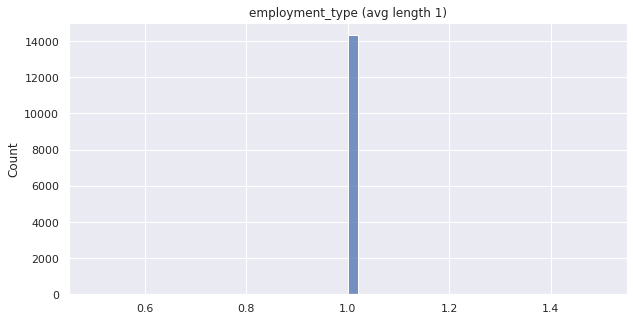

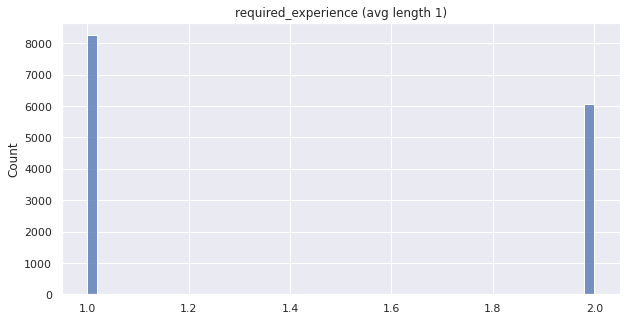

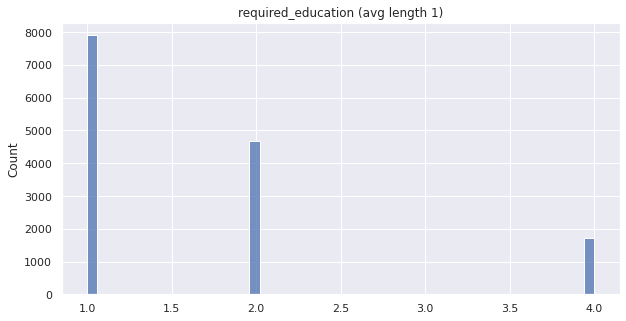

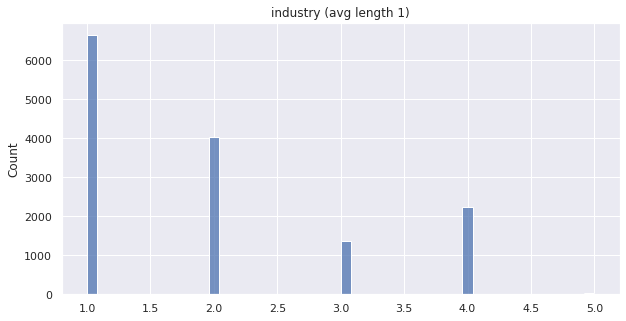

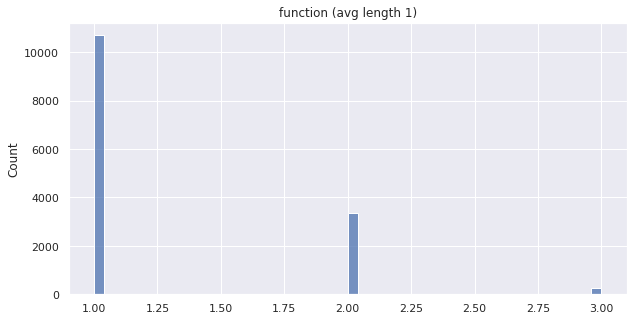

In [ ]:
text_columns = [col_name for col_name, col_type in data.dtypes.iteritems() if col_type=="object"]
sns.set(style="darkgrid")
for col in text_columns:
  plt.figure(figsize=(10,5))
  avg_length = int(np.mean(data[col].apply(lambda x: len(str(x).split())).values))
  sns.histplot(data=data[col].apply(lambda x: len(str(x).split())).values, bins=50)
  plt.title(f"{col} (avg length {avg_length})")
  plt.show()